In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections
from tqdm.auto import tqdm
import scipy.sparse as sp
import pickle as pkl
import os

### Create Train/Test Files

In [2]:
"""
1. Create Train/Test files. (Only Train documents will need to be augmented).
2. Generate and save train augmentations. 
3. We need to create a SHARED vocab over train, val, test sets. 
4. 
"""

'\n1. Create Train/Test files. (Only Train documents will need to be augmented).\n2. Generate and save train augmentations. \n3. We need to create a SHARED vocab over train, val, test sets. \n4. \n'

In [3]:
dataset = "R8"

In [4]:
doc_name_list = []
with open('../data/' + dataset + '.txt', 'r') as f:
    for line in f.readlines():
        doc_name_list.append(line.strip())

In [12]:
R8_label_dict = {'acq':0, 'crude':1, 'earn':2, 'grain':3, 'interest':4, 'money-fx':5, 'ship':6, 'trade':7}

In [15]:
# load raw text
doc_train_list = []
doc_test_list = []
train_labels = []
test_labels = []
with open('../data/corpus/' + dataset + '.clean.txt', 'r') as f:
    for name, line in zip(doc_name_list,f.readlines()):
        idx, split, label = name.split("\t")
        if split == 'train':
            doc_train_list.append("{}\t{}\n".format(idx,line.strip()))
            label = R8_label_dict[label]
            train_labels.append(label)
        elif split == 'test':
            doc_test_list.append("{}\t{}\n".format(idx,line.strip()))
            label = R8_label_dict[label]
            test_labels.append(label)
print("Train Samples: ", len(doc_train_list))
print("Train Labels: ",len(train_labels))
print("Test Samples: ", len(doc_test_list))
print("Test Samples: ",len(test_labels))

Train Samples:  5485
Train Labels:  5485
Test Samples:  2189
Test Samples:  2189


In [16]:
# save into parsed train vs. test files
try: 
    os.makedirs("../aug_data/{}".format(dataset))
except:
    print("Directory exists!")
    
with open("../aug_data/{}_train.txt".format(dataset),'w') as file:
    for l in doc_train_list:
        file.writelines(l)

with open("../aug_data/{}_train_labels.txt".format(dataset),'w') as file:
    for l in train_labels:
        file.writelines(str(l))
print("Train saved!")

with open("../aug_data/{}_test.txt".format(dataset),'w') as file:
    for l in doc_test_list:
        file.writelines(l)
        
with open("../aug_data/{}_test_labels.txt".format(dataset),'w') as file:
    for l in test_labels:
        file.writelines(str(l))
print("Test saved!")

Directory exists!
Train saved!
Test saved!


In [ ]:
!pwd

In [ ]:
!head -n5 ../aug_data/raw/

### Generate + Clean Augmentations

Run the following command: 
python ../../eda_nlp/code/augment.py --input=[dataset_train.txt] --output=[dataset_train_aug.txt] --num_aug=[x2epochs] --alpha_sr=0.05 --alpha_rd=0.1 --alpha_ri=0.05 --alpha_rs=0.05
python remove_words.py --filename=[dataset_train_aug.txt]

In [ ]:
!head -n5 ../aug_data/mr/mr_train_aug_clean.txt

### Parse Augmentation File into Epoch Files!

In [22]:
"""
Split the augmented file given label ids. 
"""

file_name = "../aug_data/R8/R8_train_aug_clean_85.txt"
dataset= "R8"

In [20]:
try: 
    os.makedirs("../aug_data/{}/raw".format(dataset))
except:
    print("Directory exists!")

Directory exists!


In [23]:
aug_dict = collections.defaultdict(list)

with open(file_name, 'r') as f:
    for line in f.readlines():
        idx = line.split(" ")[0]
        l = " ".join(line.split(" ")[1:])
        #idx,l = line.strip().split("\t")
        aug_dict[int(idx)].append(l)

In [24]:
## create dictionary of sample ids, and augmented samples
## i.e. aug_dict[0] = [sample_0, sample_0_aug_1, sample_0_aug_2, ...]
aug_dict = collections.defaultdict(list)
skip_count = 0
skip_list = []
temp_vals = []
with open(file_name, 'r') as f:
    for line in f.readlines():
        idx = line.split(" ")[0]
        l = " ".join(line.split(" ")[1:])
        
        #if there is a dead sample, replace with the one before it!
        if len(l) == 0:
            print("Found a skipped item: ",idx)
            try:
                l = aug_dict[int(idx)][-1]
            except:
                l = "TEMP"
                print("TEMP ASSIGNED AT: ",idx)
                temp_vals.append(idx)
            skip_count += 1
            skip_list.append(int(idx.split()[0]))
        #idx,l = line.strip().split("\t")
        aug_dict[int(idx)].append(l)

(array([   0.,    0.,    0.,    0.,    0., 5485.,    0.,    0.,    0.,
           0.]),
 array([85.5, 85.6, 85.7, 85.8, 85.9, 86. , 86.1, 86.2, 86.3, 86.4, 86.5]),
 <a list of 10 Patch objects>)

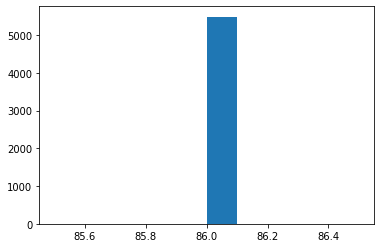

In [25]:
counts = []
for k,v in aug_dict.items():
    counts.append(len(v))
plt.hist(counts)

In [26]:
print("Aug Dict Keys: ",len(aug_dict.keys()))
print("Aug Samples per Key: ",len(aug_dict[0]))
print("Sample 0: ",aug_dict[0][0:3])

Aug Dict Keys:  5485
Aug Samples per Key:  86
Sample 0:  ['champion products approves stock split champion products inc said circuit board directors approved two one stock split common shares shareholders record apr company also said circuit board voted recommend shareholders annual meeting apr increase authorized capital stock five mln mln shares reuter\n', 'champion products increment approves stock split champion products inc said board directors approved two one stock split common shares shareholders record april company also said board voted recommend shareholders annual music director meeting april increase authorized capital stock five mln mln shares reuter\n', 'champion products approves stock split directors products inc said board champion approved two one stock split common voted shareholders record april company also said board shares recommend shareholders annual meeting april increase authorized capital stock five mln mln shares reuter\n']


In [28]:
#for num augmentations per sample. Make a separate pickle.
for i in range(0,82):
    with open("../aug_data/{0}/raw/{0}_{1}.txt".format(dataset,i), 'w') as file:
        for k,v in aug_dict.items():
            file.writelines(v[i])
    print("=> Processed: ",i)    

=> Processed:  0
=> Processed:  1
=> Processed:  2
=> Processed:  3
=> Processed:  4
=> Processed:  5
=> Processed:  6
=> Processed:  7
=> Processed:  8
=> Processed:  9
=> Processed:  10
=> Processed:  11
=> Processed:  12
=> Processed:  13
=> Processed:  14
=> Processed:  15
=> Processed:  16
=> Processed:  17
=> Processed:  18
=> Processed:  19
=> Processed:  20
=> Processed:  21
=> Processed:  22
=> Processed:  23
=> Processed:  24
=> Processed:  25
=> Processed:  26
=> Processed:  27
=> Processed:  28
=> Processed:  29
=> Processed:  30
=> Processed:  31
=> Processed:  32
=> Processed:  33
=> Processed:  34
=> Processed:  35
=> Processed:  36
=> Processed:  37
=> Processed:  38
=> Processed:  39
=> Processed:  40
=> Processed:  41
=> Processed:  42
=> Processed:  43
=> Processed:  44
=> Processed:  45
=> Processed:  46
=> Processed:  47
=> Processed:  48
=> Processed:  49
=> Processed:  50
=> Processed:  51
=> Processed:  52
=> Processed:  53
=> Processed:  54
=> Processed:  55
=>

In [31]:
!head -n 5 ../aug_data/R8/raw/R8_0.txt

champion products approves stock split champion products inc said circuit board directors approved two one stock split common shares shareholders record apr company also said circuit board voted recommend shareholders annual meeting apr increase authorized capital stock five mln mln shares reuter
computer systems completes sale computer terminal systems inc said completed sale shares common stock warrants additional one mln shares n v dlrs company said warrants exercisable five years purchase price dlrs per share computer terminal said also right buy additional shares increase total holdings pct terminal outstanding common stock certain circumstances control company company occur warrants would exercisable price pct common stock market price exceed dlrs per share computer also said sold dot impact technology including future improvements inc houston tex dlrs said would continue exclusive licensee technology company said moves part reorganization plan would pay current operation ensure 

In [ ]:
!head -n 5 ../data/corpus/mr.clean.txt

We now have an augmented version of each training/validation sentence for a fixed number of epochs.

### Create and Save Vocabulary over Corpus

Since we want to create a joint corpus. We can directly use the AUGMENTED CLEAN file. We must also include the TEST file.

In [32]:
dataset= 'R8'
window_size = 3
weighted_graph = False
truncate = False # whether to truncate long document
MAX_TRUNC_LEN = 350

In [33]:
# load pre-trained word embeddings
word_embeddings_dim = 300
word_embeddings = {}

with open('../glove.6B.' + str(word_embeddings_dim) + 'd.txt', 'r') as f:
    for line in f.readlines():
        data = line.split()
        word_embeddings[str(data[0])] = list(map(float,data[1:]))


In [34]:
doc_content_list = []

#load AUG TRAIN text
with open('../aug_data/{0}/{0}_train.txt'.format(dataset), 'r') as f:
    for line in f.readlines():
        doc_content_list.append(line.strip())

# load CLEAN TRAIN text
with open('../aug_data/{0}/{0}_train_aug_clean_85.txt'.format(dataset), 'r') as f:
    for line in f.readlines():
        doc_content_list.append(line.strip())

#load TEST text
with open('../aug_data/{0}/{0}_test.txt'.format(dataset), 'r') as f:
    for line in f.readlines():
        doc_content_list.append(line.strip())

In [35]:
# build corpus vocabulary OVER ALL DATA
word_set = set()

for doc_words in doc_content_list:
    words = doc_words.split()
    word_set.update(words)


In [36]:
vocab = list(word_set)
vocab_size = len(vocab)

In [37]:
word_id_map = {}
for i in range(vocab_size):
    word_id_map[vocab[i]] = i

In [38]:
# initialize out-of-vocabulary word embeddings
oov = {}
for v in vocab:
    oov[v] = np.random.uniform(-0.01, 0.01, word_embeddings_dim)


In [39]:
# save the word map and oov word embeddings 
with open("../aug_data/{0}/raw/{0}_word_map.pkl".format(dataset), 'wb') as output_file:
    pkl.dump(word_id_map,output_file)

with open("../aug_data/{0}/raw/{0}_oov.pkl".format(dataset), 'wb') as output_file:
    pkl.dump(oov,output_file)

In [ ]:
# # save the word map and oov word embeddings 
# with open("../aug_data/raw/word_map.pkl", 'rb') as input_file:
#     word_id_map = pkl.load(input_file)

# with open("../aug_data/raw/oov.pkl", 'rb') as input_file:
#     oov = pkl.load(input_file)


In [46]:
# build label list
doc_names = []
with open('../data/{}.txt'.format(dataset), 'r') as f:
    for line in f.readlines():
        doc_names.append(line.strip())

In [45]:
dataset

'R8'

In [49]:
labels = np.zeros((5485,8))
train_count = 0
test_count = 0
train_labels = []
for enum, doc_meta in enumerate(doc_names):
    temp = doc_meta.split('\t')
    if temp[1] == 'train': 
        idx = R8_label_dict[temp[2]]
        train_labels.append(label)
        labels[train_count][idx] = 1
        train_count += 1
    else:
        test_count += 1
print('Train Labels: ',len(labels))
np.save("../aug_data/{0}/{0}_train_y.npy".format(dataset), labels)

Train Labels:  5485


In [50]:
test_labels = np.zeros((2189,8))
test_count = 0
for enum, doc_meta in enumerate(doc_names):
    temp = doc_meta.split('\t')
    if temp[1] == 'test': 
        idx = R8_label_dict[temp[2]]
        test_labels[test_count][idx] = 1
        test_count += 1
    else:
        pass
print('Test Labels: ',len(test_labels))
np.save("../aug_data/{0}/{0}_test_y.npy".format(dataset), test_labels)

Test Labels:  2189


In [52]:
train_count, test_count

(5485, 2189)

### Build the Graphs!

In [53]:
# build graph function
def build_graph(start, end,doc_content_sublist):
    x_adj = []
    x_feature = []
    y = []
    doc_len_list = []
    vocab_set = set()

    for i in tqdm(range(start, end),disable=True):
        doc_words = doc_content_sublist[i].split()
        if truncate:
            doc_words = doc_words[:MAX_TRUNC_LEN]
        doc_len = len(doc_words)

        doc_vocab = list(set(doc_words))
        doc_nodes = len(doc_vocab)

        doc_len_list.append(doc_nodes)
        vocab_set.update(doc_vocab)

        doc_word_id_map = {}
        for j in range(doc_nodes):
            doc_word_id_map[doc_vocab[j]] = j

        # sliding windows
        windows = []
        if doc_len <= window_size:
            windows.append(doc_words)
        else:
            for j in range(doc_len - window_size + 1):
                window = doc_words[j: j + window_size]
                windows.append(window)

        word_pair_count = {}
        for window in windows:
            for p in range(1, len(window)):
                for q in range(0, p):
                    word_p = window[p]
                    word_p_id = word_id_map[word_p]
                    word_q = window[q]
                    word_q_id = word_id_map[word_q]
                    if word_p_id == word_q_id:
                        continue
                    word_pair_key = (word_p_id, word_q_id)
                    # word co-occurrences as weights
                    if word_pair_key in word_pair_count:
                        word_pair_count[word_pair_key] += 1.
                    else:
                        word_pair_count[word_pair_key] = 1.
                    # bi-direction
                    word_pair_key = (word_q_id, word_p_id)
                    if word_pair_key in word_pair_count:
                        word_pair_count[word_pair_key] += 1.
                    else:
                        word_pair_count[word_pair_key] = 1.
    
        row = []
        col = []
        weight = []
        features = []

        for key in word_pair_count:
            p = key[0]
            q = key[1]
            row.append(doc_word_id_map[vocab[p]])
            col.append(doc_word_id_map[vocab[q]])
            weight.append(word_pair_count[key] if weighted_graph else 1.)
        adj = sp.csr_matrix((weight, (row, col)), shape=(doc_nodes, doc_nodes))
    
        for k, v in sorted(doc_word_id_map.items(), key=lambda x: x[1]):
            features.append(word_embeddings[k] if k in word_embeddings else oov[k])

        x_adj.append(adj)
        x_feature.append(features)
    
    return x_adj, x_feature

In [54]:
try: 
    os.makedirs("../aug_data/{}/processed".format(dataset))
except:
    print("Directory exists!")

In [56]:
## Create a graph pkl file for every augmented epoch. (the txt files generated above!)
short_list = []
for epoch in range(85):
    doc_content_list = []
    with open('../aug_data/{0}/raw/{0}_{1}.txt'.format(dataset,epoch), 'r') as f:
        for line in f.readlines():
            doc_content_list.append(line.strip())
    adj, features = build_graph(start=0,end=len(doc_content_list),doc_content_sublist=doc_content_list)
    
    with open("../aug_data/{0}/processed/{0}_adj_{1}.pkl".format(dataset,epoch),'wb') as file:
        pkl.dump(adj,file)
    
    with open("../aug_data/{0}/processed/{0}_feat_{1}.pkl".format(dataset,epoch),'wb') as file:
        pkl.dump(features,file)
        
    if len(doc_content_list) < 5485:
        print("*"*50)
        print("MISSING SAMPLES!", epoch)
        print("*"*50)
        short_list.append(epoch)
    print("=> Processed: ",epoch, len(doc_content_list))

=> Processed:  0 5485
=> Processed:  1 5485
=> Processed:  2 5485
=> Processed:  3 5485
=> Processed:  4 5485
=> Processed:  5 5485
=> Processed:  6 5485
=> Processed:  7 5485
=> Processed:  8 5485
=> Processed:  9 5485
=> Processed:  10 5485
=> Processed:  11 5485
=> Processed:  12 5485
=> Processed:  13 5485
=> Processed:  14 5485
=> Processed:  15 5485
=> Processed:  16 5485
=> Processed:  17 5485
=> Processed:  18 5485
=> Processed:  19 5485
=> Processed:  20 5485
=> Processed:  21 5485
=> Processed:  22 5485
=> Processed:  23 5485
=> Processed:  24 5485
=> Processed:  25 5485
=> Processed:  26 5485
=> Processed:  27 5485
=> Processed:  28 5485
=> Processed:  29 5485
=> Processed:  30 5485
=> Processed:  31 5485
=> Processed:  32 5485
=> Processed:  33 5485
=> Processed:  34 5485
=> Processed:  35 5485
=> Processed:  36 5485
=> Processed:  37 5485
=> Processed:  38 5485
=> Processed:  39 5485
=> Processed:  40 5485
=> Processed:  41 5485
=> Processed:  42 5485
=> Processed:  43 548

FileNotFoundError: [Errno 2] No such file or directory: '../aug_data/R8/raw/R8_82.txt'

In [57]:
with open("../aug_data/{0}/processed/{0}_adj_test.pkl".format(dataset),'wb') as file:
    pkl.dump(adj,file)
    
with open("../aug_data/{0}/processed/{0}_feat_test.pkl".format(dataset),'wb') as file:
    pkl.dump(features,file)

In [58]:
"""
IMPORTANT: SAVE THE TEST SET USING THE PROVIDED VOCABULARY AND MAPPING!
"""
doc_content_list = []
with open('../aug_data/{0}/{0}_test.txt'.format(dataset), 'r') as f:
    for line in f.readlines():
        doc_content_list.append(line.split("\t")[1].strip())
adj, features = build_graph(start=0,end=len(doc_content_list),doc_content_sublist=doc_content_list)


with open("../aug_data/{0}/processed/{0}_adj_test.pkl".format(dataset),'wb') as file:
    pkl.dump(adj,file)
    
with open("../aug_data/{0}/processed/{0}_feat_test.pkl".format(dataset),'wb') as file:
    pkl.dump(features,file)

In [59]:
"""
IMPORTANT: SAVE THE TRAIN SET USING THE PROVIDED VOCABULARY AND MAPPING!
"""
doc_content_list = []
with open('../aug_data/{0}/{0}_train.txt'.format(dataset), 'r') as f:
    for line in f.readlines():
        doc_content_list.append(line.split("\t")[1].strip())
adj, features = build_graph(start=0,end=len(doc_content_list),doc_content_sublist=doc_content_list)


with open("../aug_data/{0}/processed/{0}_adj_train.pkl".format(dataset),'wb') as file:
    pkl.dump(adj,file)
    
with open("../aug_data/{0}/processed/{0}_feat_train.pkl".format(dataset),'wb') as file:
    pkl.dump(features,file)